In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from nltk import WordNetLemmatizer
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from datetime import datetime
import optuna
from sklearn.model_selection import cross_val_predict
import dill
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
import shap

In [2]:
#считываем данные 
df = pd.read_csv('ML_final_preprocessing.csv')
df.head()

,id,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,...,enc_loans_credit_type_6,enc_loans_credit_type_7,pre_loans_max_overdue_sum_0,pre_loans3060_0,pre_loans3060_3,pre_loans5_10,pre_loans530_17,pre_loans3060_4,pre_loans6090_0,flag
0,0,0,1,1,1,1,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,1,0,0,0,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0,3,1,0,2,1,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
df.shape

(3000000, 420)

Закодируем последний не закодированный столбец

In [9]:
# найдем его индекс
df.columns.get_loc('total_loans')

400

In [4]:
total_loans = df.columns[400:401].tolist()
code_total = pd.get_dummies(df[total_loans], columns = total_loans, dtype='int8')
df = pd.concat([df, code_total], axis = 1)

Сразу удалим столбец id и total_loans - они нам больше не нужны 

In [9]:
df = df.drop(columns = ['id', 'total_loans'])
df.head()

,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,...,total_loans_45,total_loans_46,total_loans_47,total_loans_48,total_loans_49,total_loans_50,total_loans_51,total_loans_54,total_loans_55,total_loans_58
0,0,1,1,1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,1,0,2,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#посмотрим, не осталось ли у нас незакодированных столбцов
df.columns.tolist()

['pre_since_opened_0',
 'pre_since_opened_1',
 'pre_since_opened_2',
 'pre_since_opened_3',
 'pre_since_opened_4',
 'pre_since_opened_5',
 'pre_since_opened_6',
 'pre_since_opened_7',
 'pre_since_opened_8',
 'pre_since_opened_9',
 'pre_since_opened_10',
 'pre_since_opened_11',
 'pre_since_opened_12',
 'pre_since_opened_13',
 'pre_since_opened_14',
 'pre_since_opened_15',
 'pre_since_opened_16',
 'pre_since_opened_17',
 'pre_since_opened_18',
 'pre_since_opened_19',
 'pre_since_confirmed_0',
 'pre_since_confirmed_1',
 'pre_since_confirmed_2',
 'pre_since_confirmed_3',
 'pre_since_confirmed_4',
 'pre_since_confirmed_5',
 'pre_since_confirmed_6',
 'pre_since_confirmed_7',
 'pre_since_confirmed_8',
 'pre_since_confirmed_9',
 'pre_since_confirmed_10',
 'pre_since_confirmed_11',
 'pre_since_confirmed_12',
 'pre_since_confirmed_13',
 'pre_since_confirmed_14',
 'pre_since_confirmed_15',
 'pre_since_confirmed_16',
 'pre_since_confirmed_17',
 'pre_pterm_0',
 'pre_pterm_1',
 'pre_pterm_2',
 'pre_

Построим корреляционную матрицу

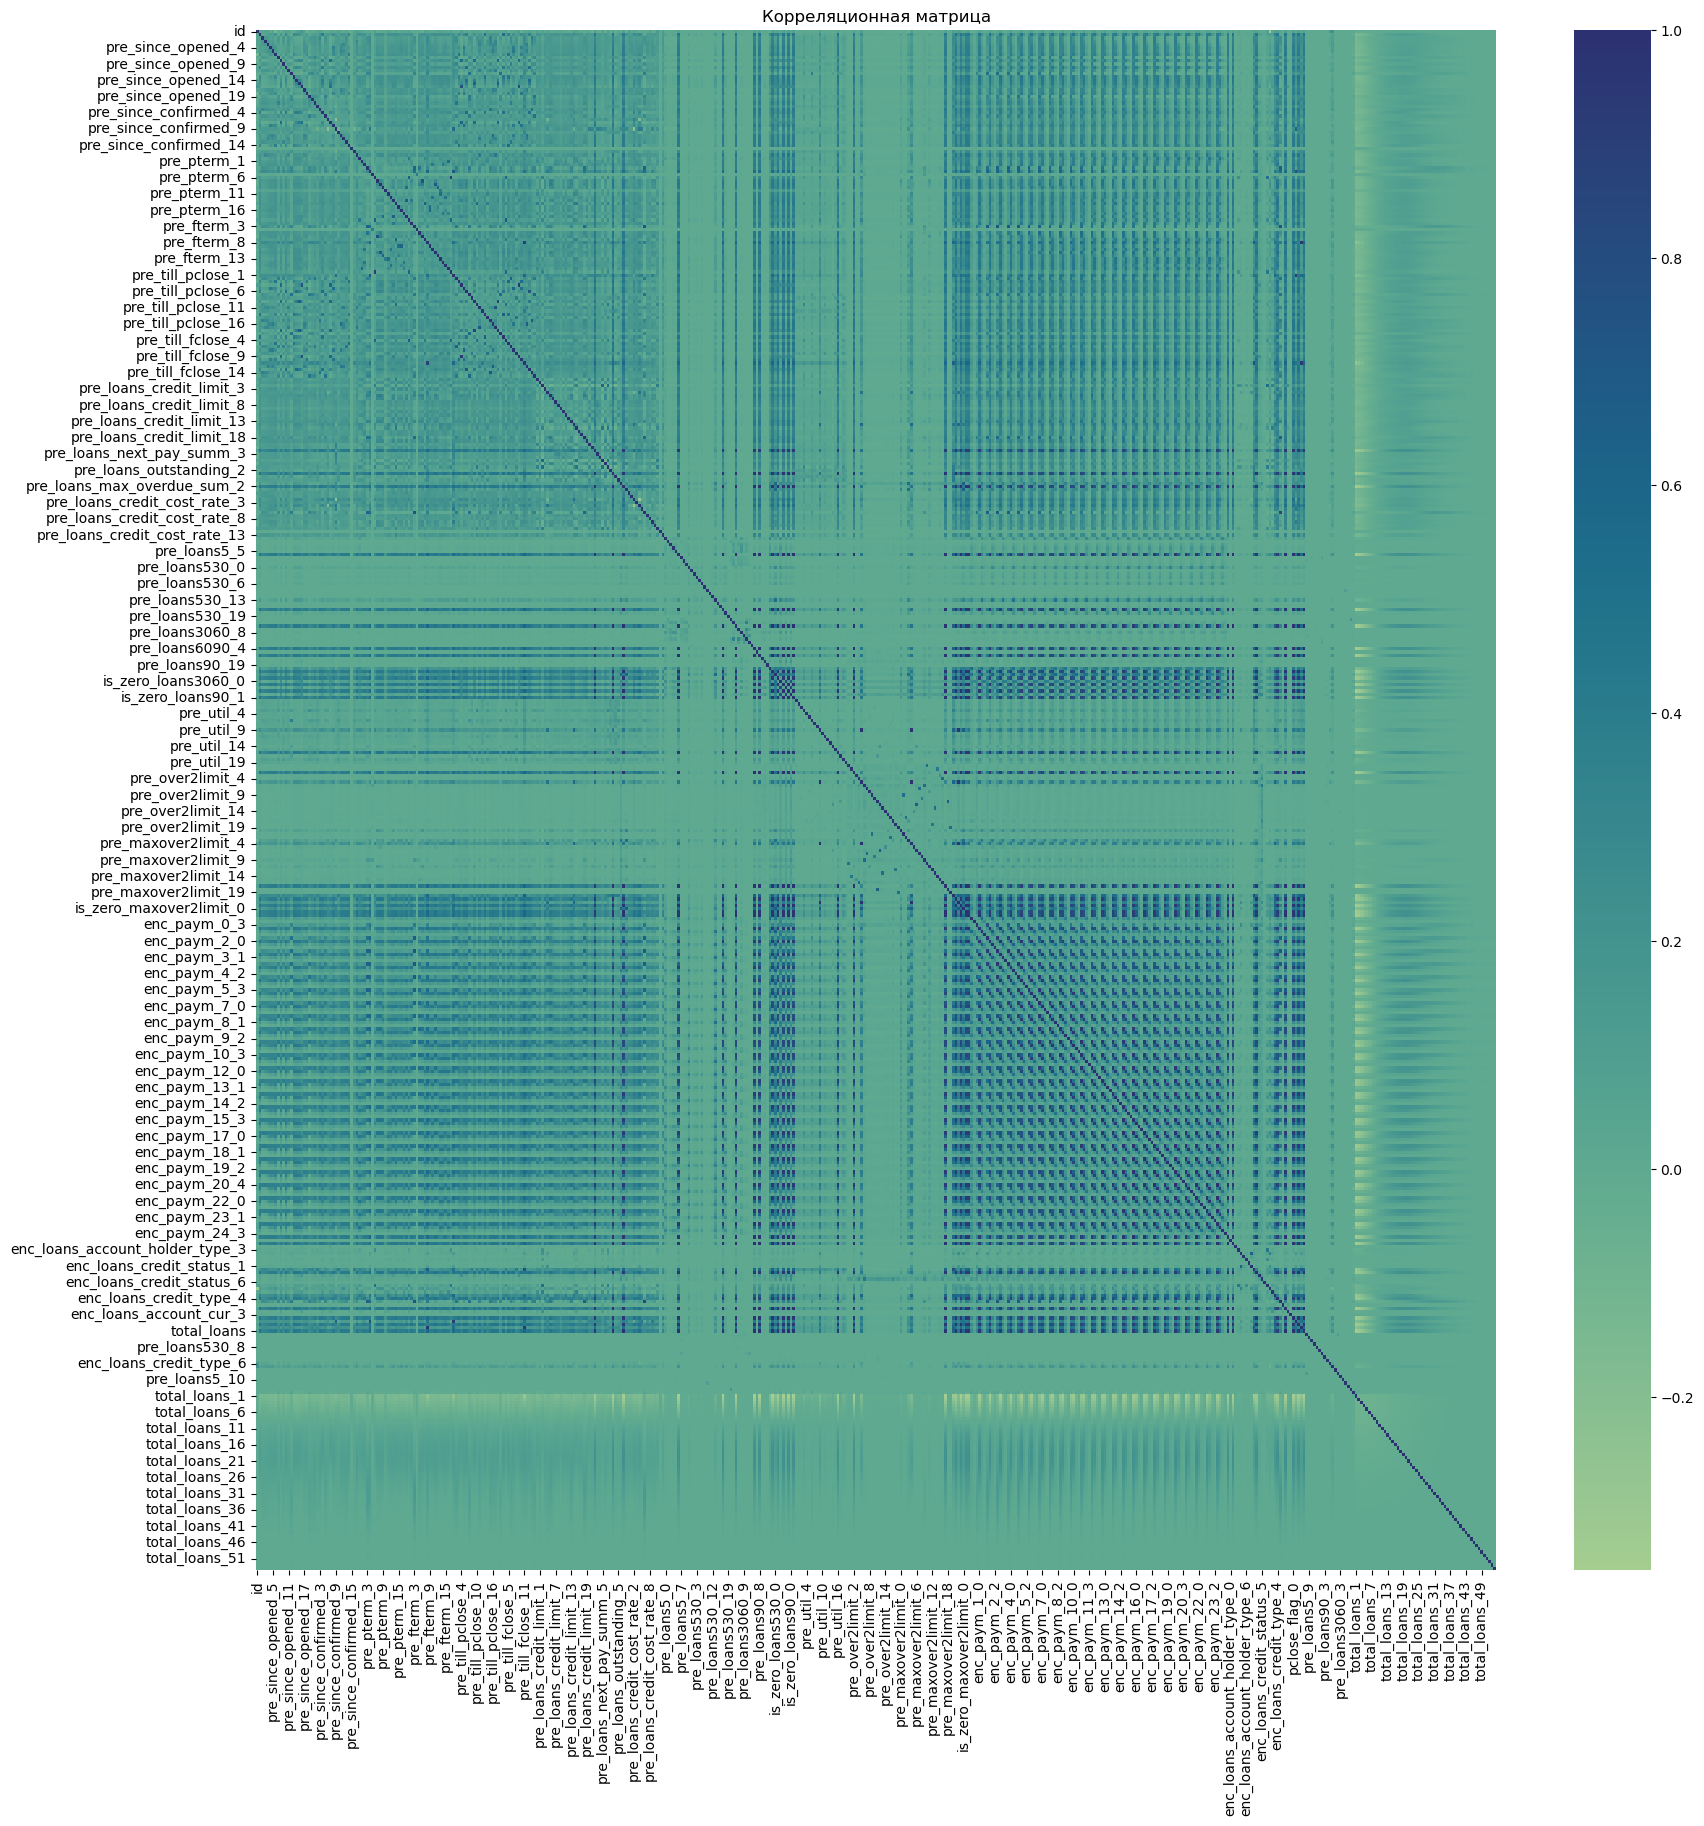

In [5]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='crest')
plt.title('Корреляционная матрица')
plt.show()

Из корреляционной матрицы видно, что сильно корреляции между признаками как таковой нет

In [10]:
# разделим на обучающую и отложенную выборку
df_train, df_test = train_test_split(df, stratify=df['flag'], test_size = 0.3, random_state = 35)

In [12]:
# выровняем дисбаланс класса

df_min = df_train[df_train['flag'] == 1]
df_maj = df_train[df_train['flag'] == 0]

df_maj_dwn = resample(df_maj, replace = False, n_samples = len(df_min), random_state = 1)

In [13]:
print(df_maj_dwn.shape)
print(df_min.shape)

(74509, 472)
(74509, 472)


In [14]:
# склеиваем обе части и смотрим размерность сета
df_train_ump = pd.concat([df_maj_dwn, df_min], ignore_index=True).sample(frac = 1)
df_train_ump.shape

(149018, 472)

Делаем пайплан обучения модели 

In [15]:
def fit():
    X = df_train_ump.drop('flag', axis = 1)
    y = df_train_ump['flag']
    
    models = [
        LogisticRegression(solver = 'liblinear', penalty = 'l2'),
        RandomForestClassifier(max_depth=200),
        HistGradientBoostingClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    for model in models:
        pipe = Pipeline(steps = [
            ('models', model)
        ])
        
        score = cross_val_score(pipe, X, y, cv = 5, scoring = 'roc_auc')
        print(f'model: {type(model).__name__}, roc_auc: {score.mean():.4f}')

Выведем результат работы

In [47]:
fit()

model: LogisticRegression, roc_auc: 0.7383
model: RandomForestClassifier, roc_auc: 0.7379
model: HistGradientBoostingClassifier, roc_auc: 0.7570
model: XGBClassifier, roc_auc: 0.7509
[LightGBM] [Info] Number of positive: 59607, number of negative: 59607
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5877
[LightGBM] [Info] Number of data points in the train set: 119214, number of used features: 420
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 59607, number of negative: 59607
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

Попробуем улучшить модель HistGradientBoostingClassifier

In [240]:
def objective_2(trial):
    X = df_train_ump.drop('flag', axis = 1)
    y = df_train_ump['flag']
    
    data, target = X, y
    
    param = {
            'max_iter' : trial.suggest_int('max_iter', 100, 1000),
            'max_depth':trial.suggest_int('max_depth', 2, 40),
            'min_samples_leaf':trial.suggest_int('min_samples_leaf', 2, 100),
            'learning_rate':trial.suggest_float('learning_rate',0.01, 0.5),
            'random_state': trial.suggest_int('random_state', 1, 300)
    }
    
    hgb = HistGradientBoostingClassifier(**param)
    hgb.fit(X, y)
    preds_hgb = hgb.predict(X)
    roc_auc = roc_auc_score(y, preds_hgb)
    return roc_auc 

In [241]:
study = optuna.create_study(study_name = 'HistGradientBoostingClassifier', direction = 'maximize')
study.optimize(objective_2, n_trials = 1000)
print('Bets params {}'.format(study.best_params))
print('roc_auc score на обучающей выборке:{:.4f}'.format(study.best_value))

[I 2024-07-16 21:09:34,357] A new study created in memory with name: HistGradientBoostingClassifier
[I 2024-07-16 21:09:50,619] Trial 0 finished with value: 0.7130346669529856 and parameters: {'max_iter': 229, 'max_depth': 22, 'min_samples_leaf': 63, 'learning_rate': 0.05639281136863025, 'random_state': 196}. Best is trial 0 with value: 0.7130346669529856.
[I 2024-07-16 21:09:56,627] Trial 1 finished with value: 0.714202311130199 and parameters: {'max_iter': 958, 'max_depth': 32, 'min_samples_leaf': 43, 'learning_rate': 0.21425298845790866, 'random_state': 180}. Best is trial 1 with value: 0.714202311130199.
[I 2024-07-16 21:10:00,405] Trial 2 finished with value: 0.7079950073145526 and parameters: {'max_iter': 705, 'max_depth': 17, 'min_samples_leaf': 36, 'learning_rate': 0.3485151247582975, 'random_state': 285}. Best is trial 1 with value: 0.714202311130199.
[I 2024-07-16 21:10:08,620] Trial 3 finished with value: 0.6939832771879907 and parameters: {'max_iter': 807, 'max_depth': 2, '

Bets params {'max_iter': 929, 'max_depth': 6, 'min_samples_leaf': 19, 'learning_rate': 0.08233557052131475, 'random_state': 51}
roc_auc score на обучающей выборке:0.7315


In [16]:
Xtest = df_test.drop('flag', axis = 1)
ytest = df_test['flag']
    
    
model = HistGradientBoostingClassifier(max_iter = 929, max_depth = 6, min_samples_leaf = 19, 
                                       learning_rate = 0.0823355705213147, random_state = 51)
model.fit(Xtest, ytest)

HistGradientBoostingClassifier(learning_rate=0.0823355705213147, max_depth=6,
                               max_iter=929, min_samples_leaf=19,
                               random_state=51)

In [17]:
predict = model.predict_proba(Xtest)
print(f'Roc_auc на тестовой выборке:', roc_auc_score(ytest, predict[:, 1]))

Roc_auc на тестовой выборке: 0.7916269578873343


Мы добились roc_auc на тесте больше 0.75, посмотрим и раскроем остальные метрики. 

Для начала из вероятности метки класса сделаем метку класса

In [18]:
predict_class = np.where(predict[:, 1] <= 0.5, 0, 1)

In [19]:
print(classification_report(ytest, predict_class, labels = ['0', '1']))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    868067
           1       0.84      0.00      0.00     31933

   micro avg       0.96      0.96      0.96    900000
   macro avg       0.90      0.50      0.49    900000
weighted avg       0.96      0.96      0.95    900000



Из данной таблицы мы видим, что полнота на положительном классе 100%, точность 0.96
А вот с отрицательным классом точность выше, чем полнота, что является хороим показателем для банковского кредита - нужна точность, а не полнота. Но совсем нулевая полнота, я так понимаю, из-за дисбаланса классов

Посмотрим, какие фичи больше повлияли на модель

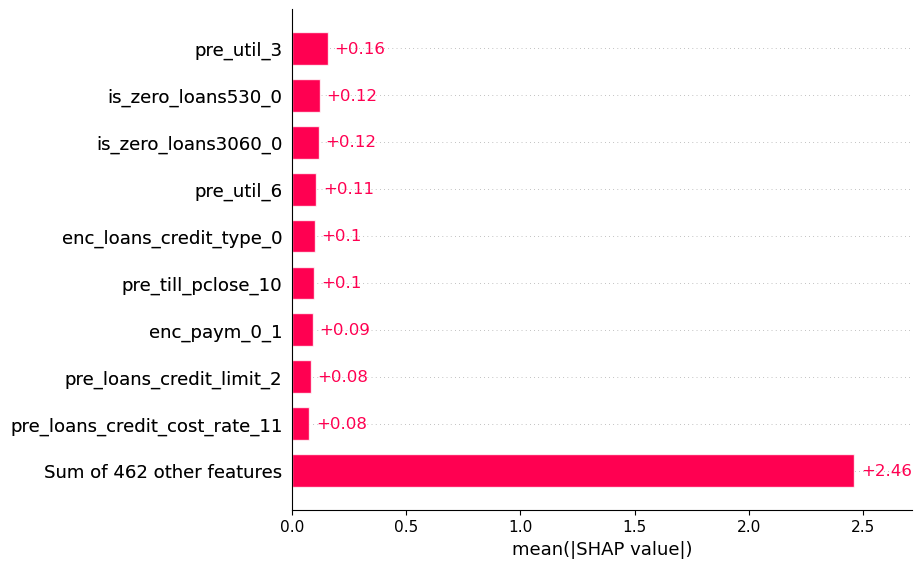

In [20]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(Xtest)
shap.plots.bar(shap_values)

Из данного графика видим, что осноные признаки, внесли вклад признаки: отношение оствшийся невыплаченной суммы кредита,  отсутствие просрочки от 5 до 60 дней

Построим roc_auc 

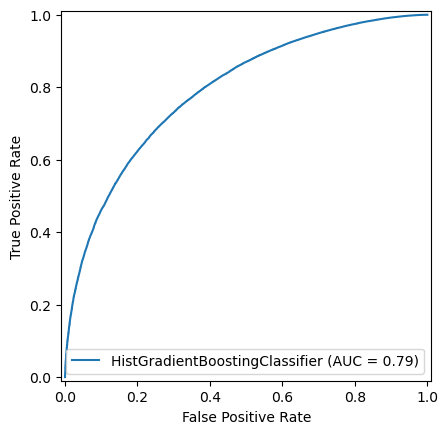

In [21]:
fpr, tpr, thr = roc_curve(ytest, predict[:, 0], pos_label = 0)
roc_auc = auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name = 'HistGradientBoostingClassifier')
display.plot()
plt.show()

Roc кривая показывает, что модель не плохо обучилась

Посмотрим на confusion_matrix

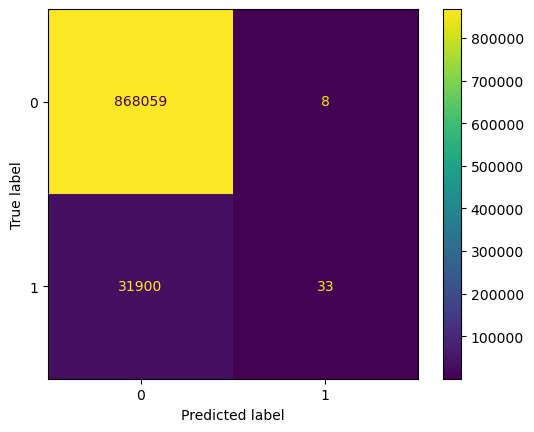

In [229]:
cm = confusion_matrix(ytest, predict_class)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['0', '1'])
disp.plot()
plt.show()

На матрице мы видим, что больше всего ошибок на ошибке второго рода (false nagative), что для выдачи/невыдачи кредита менее значительна, чем ошибка первого рода (false positive). Поэтому модель может быть применима в работе. 

Запишем ее в pikle файл

In [ ]:
def main():
    Xtest = df_test.drop('flag', axis = 1)
    ytest = df_test['flag']
    
    models = HistGradientBoostingClassifier(max_iter = 850, max_depth = 6, min_samples_leaf = 22, 
                                       learning_rate = 0.10703236121658935, random_state = 261)
    
    score_test = cross_val_score(model, Xtest, ytest, cv = 5, scoring = 'roc_auc')
    best_score = score_test.mean()
    
    with open ('model_for_credit.pkl', 'wb') as file:
        dill.dump({
            'model': models,
            'metadata': {
                'name': 'model_for_credit',
                'autor': "Anastsia Piletskaya",
                'version': 0,
                'data': datetime.now(),
                'roc_auc': best_score, 
            },
        }, file)

In [ ]:
main()